### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**How long do rides usually take?**

In [5]:
library(ggplot2)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [6]:
# Create missing columns to each dataframe for concatenation.
wash$Gender <- NA
wash$Birth.Year <-NA
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'

In [7]:
# Concatenation function.
concatenation <- function(df1, df2) {
  return(rbind(df1, df2))
}

In [8]:
# Perform concatenation.
city <- concatenation(ny,wash)
city <- concatenation(city,chi)
head(city)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City


In [9]:
# Travellers count per city.
travellers_count = sort(table(city$City))
print(travellers_count)

# Percentage of travellers per city.
round((travellers_count / sum(travellers_count) * 100), digits = 2)


      Chicago New York City    Washington 
         8630         54770         89051 



      Chicago New York City    Washington 
         5.66         35.93         58.41 

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

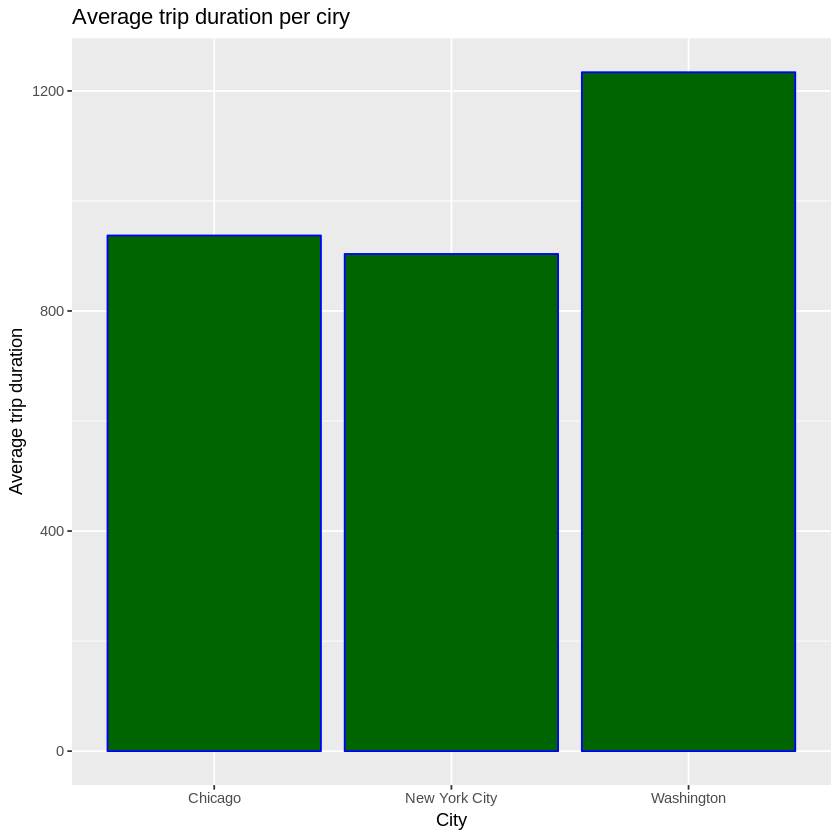

In [10]:
# Plotting
ggplot(aes(x = City, y = Trip.Duration), data = city) +
    geom_bar(position = 'dodge', stat = "summary", fun.y = "mean", fill = "darkgreen", colour="blue") + 
    ggtitle('Average trip duration per ciry') +
    labs(y = 'Average trip duration', x = 'City')

In [11]:
Summary <- with(city, aggregate(list(Trip.Duration), by = list(City), 
                   FUN = function(x) { mon.mean = mean(x, na.rm = TRUE) } ))

colnames(Summary) <- c('City', 'Avrg.Duration')
Summary

City,Avrg.Duration
Chicago,937.1728
New York City,903.6147
Washington,1233.9533


**Summary of your question 1 results goes here.**

- Washingotn has the highest trip duration rate = 1233.9533.
- The average trip duration in Chicago and New.York.City is very close.

### Question 2

**Is there a difference between number of rides per gender?**

In [12]:
# Using data of New.York.City and Chicago as Washington doesn't have 'Gender' column.

chi_ny <- concatenation(chi,ny)

In [13]:
# Count of each gender.
count = sort(table(chi_ny$Gender))
print(count)

# Percentage of each gender.
round((count / length(chi_ny$Gender) * 100), digits = 2)


       Female   Male 
  7158  13882  42360 



       Female   Male 
 11.29  21.90  66.81 

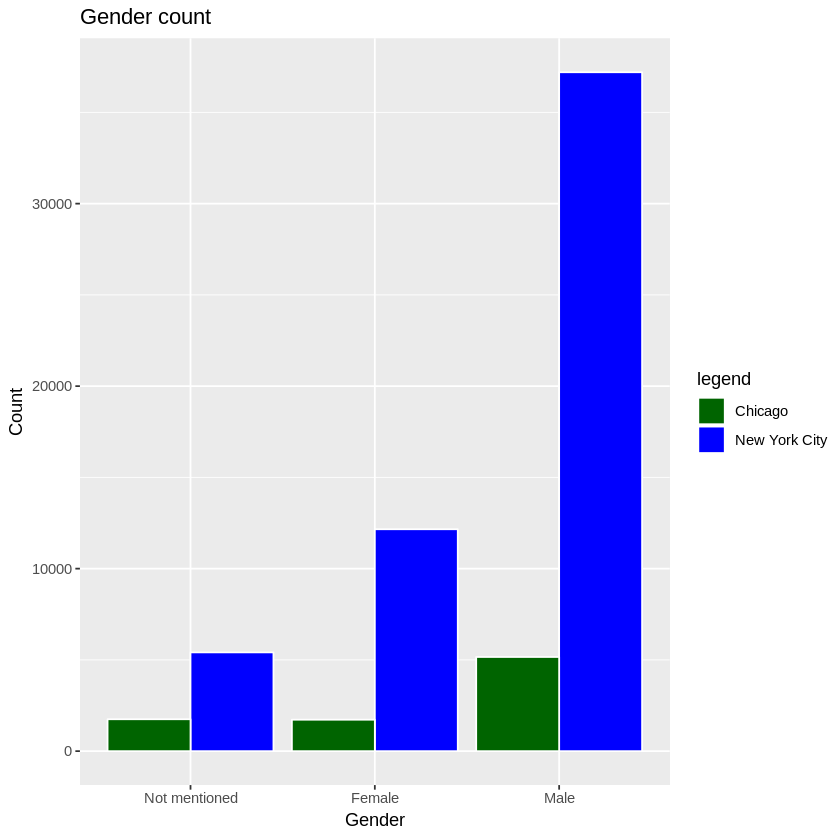

In [14]:
# Plotting
ggplot(aes(x = Gender, fill = City), data = chi_ny) +
    geom_bar(position = 'dodge', colour="white") +
    ggtitle('Gender count') +
    scale_x_discrete(labels = c('Not mentioned', 'Female', 'Male')) +
    labs(y = 'Count', x = 'Gender') +
    scale_fill_manual("legend", values = c("Chicago" = "darkgreen", "New York City" = "blue"))

In [15]:
# Gender count in Chicago.
count_chi = sort(table(chi_ny$Gender[chi_ny$City == 'Chicago']))
print(count_chi)

# Gender percentage in Chicago.
round((count_chi / length(chi_ny$Gender[chi_ny$City == 'Chicago']) * 100), digits = 2)


Female          Male 
  1723   1748   5159 



Female          Male 
 19.97  20.25  59.78 

In [16]:
# Gender count in Chicago.
count_ny = sort(table(chi_ny$Gender[chi_ny$City == 'New York City']))
print(count_ny)

# Gender percentage in Chicago.
round((count_ny / length(chi_ny$Gender[chi_ny$City == 'New York City']) * 100), digits = 2)


       Female   Male 
  5410  12159  37201 



       Female   Male 
  9.88  22.20  67.92 

**Summary of your question 2 results goes here.**

- Count of each gender in the 2 cities combined (Washington doesn't have info about gender):
    - Males: 42360 (66.81%)
    - Females: 13882 (21.90%)
    - Not Mentioned: 7158 (11.29%)
      
  
* Count of each gender in Chicago:
    - Males: 5159 (59.78%)
    - Females: 1723 (19.97%)
    - Not Mentioned: 1748 (20.25%)  
    
    
* Count of each gender in New York City:
    - Males: 37201 (67.92%)
    - Females: 12159 (22.20%)
    - Not Mentioned: 5410 (9.88%)

### Question 3

**What is the averae age of the users?**

In [17]:
# Calculate users age.
calcAge <- function(df_) {
    df_$Age <- strtoi(strftime(df_$Start.Time, format="%Y")) - df_$Birth.Year
    df_
}

In [18]:
ny_age <- calcAge(ny)
chi_age <- calcAge(chi)

Warning message:
“Removed 6965 rows containing non-finite values (stat_count).”

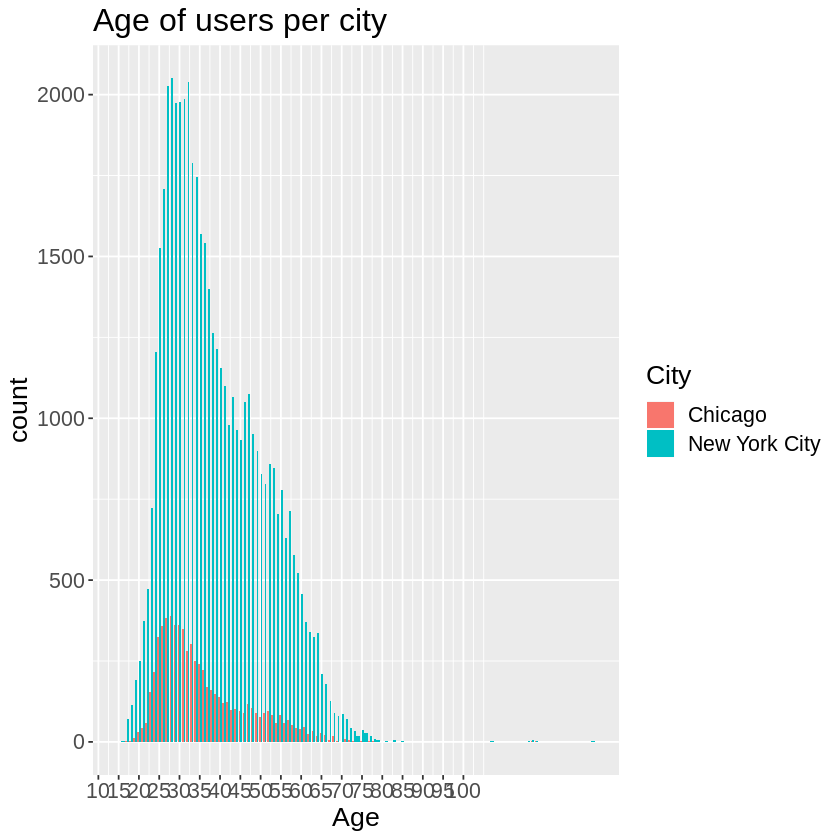

In [19]:
df1 <- rbind(ny_age, chi_age)

ggplot(aes(x=Age, fill=City), data=df1) +
    geom_bar(position='dodge') +
    theme(text = element_text(size = 16)) +
    ggtitle("Age of users per city") +
    scale_x_continuous(breaks = seq(0, 100, by = 5)) +
    labs(x = "Age")

In [20]:
summary(df1$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  15.00   29.00   36.00   38.46   47.00  132.00    6965 

In [21]:
summary(ny_age$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  16.00   29.00   36.00   38.79   47.00  132.00    5218 

In [22]:
summary(chi_age$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   15.0    28.0    33.0    36.1    42.0   118.0    1747 

**Summary of your question 3 results goes here.**

- Mean of users age = 38.
Median of user age is 36 years old, with most users between 29 to 47 years old. Median user ages is younger in Chicago (33 years old) than New York (36 years old).

- There are some users inputted invalid birth dates as we see the ages are skewed up to 132 years.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [23]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')